<h2><center>Aprendizado de Máquina - Projeto Final</center></h2>
<h2><center>Problemas de Classificação - Implementação de um Algoritmo Knn</center></h2>

<h4><center>Otávio de Meira Lima - 2019054900</center></h4>

O trabalho proposto nesse projeto foi resolver problemas de classificação por meio de uma implementação própria de um algoritmo conhecido como K-nearest neighbors. Ao longo do projeto, foram implementadas todos os métodos em que tradicionalmente se utiliza bibliotecas com métodos prontos, como a separação dos dados em treino e teste, implementação completa de uma Estrutura de Dados denominada Árvore K-d, métodos para treinar e até mesmo para avaliar o modelo por meio de métricas tradicionais. Após a avaliação do modelo, os classificadores tradicionais da biblioteca scikitlearn foram utilizados para comparar o quão eficaz é o modelo implementado.

Apesar de que todos os métodos tradicionais foram implementados, é necessário realizar sua importação das bibliotecas do Python para que todo o processo de comparação seja separado entre métodos e modelos de implementação própria e métodos de biblioteca.

In [400]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import random
import heapq
from statistics import mode
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from lightgbm import LGBMClassifier

A seguir, foram implementadas todos os métodos necessários para leitura e manipulação dos dados.
</br>
</br>
O primeiro método, getDataPoints, recebe o nome do arquivo e retorna os pontos de maneira padronizada. Todos os pontos devem ser padronizados como float para possibilitar a realização de cálculos durante a construção e treinamento da árvore Kd.
O método seguinte, getDimensions, simplesmente retorna a quantidade de dimensões dos dados presentes. Isso pode ser resolvido também por meio do atributo db.shape.
</br>
</br>
O método getTrainingAndTestsPoints recebe os dados e os divide em dados de treino e teste em uma proporção 70-30. A lista de dados é embaralhada e os primeiros 70% dos dados se tornam dados de treino e o restante são dados de teste. Essa é a implementação do método 'train_test_split' da biblioteca sklearn.model_selection.
</br>
</br>
O método getUniqueClasses retorna a quantidade de classificações possíveis existem para os dados. Apenas a primeira será considerada a classificação positiva quando métricas estiverem sendo calculadas. Esse método pode ser facilmente implementado por meio de métodos nativos do python, como len(set(class_list)).

In [401]:
def getDataPoints(filename):
    data = np.loadtxt(filename, delimiter=',', dtype=str)

    listofpoints = []

    for d in data:
        listofpoints.append(tuple(d))

    ans = []
    for tupl in listofpoints:
        temp = []
        for x in tupl:
            try:
                temp.append(float(x))
            except Exception:
                temp.append(x)
        ans.append(tuple(temp))

    return ans

def getDimensions(data):
    return len(data[0])

def getTrainingAndTestsPoints(data):

    seventyPercent = int((70/100)*len(data))
    random.shuffle(data)

    trainingPoints = data[:seventyPercent]
    testPoints = data[seventyPercent + 1:]

    return trainingPoints, testPoints

def getUniqueClasses(data):
    classes = []
    dimension = getDimensions(data)

    for p in data:
        if classes.count(p[dimension-1]) == 0:
            classes.append(p[dimension-1])

    return classes

Ná célula a seguir está implementada a árvore K-d. Essa é uma estrutura de dados bem única, já que consegue dividir os dados em qualquer espaço por meio de uma árvore binária com representação 2D. Cada nó da árvore representa uma divisão dos pontos em uma das dimensões. O nó raiz divide os pontos na metade a partir dos dados da dimensão 1, o nó na altura 2 divide os pontos na metade a partir dos dados da dimensão 2 e segue esse padrão até os nós folha. Caso a árvore tenha maior altura do que a quantidade de nós, os pontos são divididos novamente na dimensão 1. Assim se repete até que o espaço resultante só possua um ponto, que está presente no nó raiz. Os nós que estão à esquerda estarão presentes na sub-árvore da esquerda, enquanto os nós da direita estarão presentes na subárvore da direita.
</br>
A seguir, está exemplificado uma execução do algoritmo com uma quantidade reduzida de dados em apenas 2 dimensões. 
</br>
</br>
Inicialmente, 10 dados estão distribuídos dessa maneira em um espaço bidimensional:
</br>
</br>
<img src="./images/start.png" width="500" height="300">
</br>
</br>
Em seguida, calculamos qual é o dado que está no meio de todos, ou seja, separa os dados em dois, e traçamos uma reta para facilitar a visualização. O valor no eixo X desse ponto se torna o nó raiz.
</br>
</br>
<img src="./images/kd1.png" width="500" height="300">
</br>
</br>
A fins de exemplificação, segue-se para a sub-árvore da direita, agora selecionando um ponto que divide-os no eixo Y. A árvore resultante fica exemplificada à direita. O ponto p6 é o que está no meio. Em caso de quantidade par de pontos, o ponto que divide fica para o lado direito.
</br>
</br>
<img src="./images/kd2.png" width="500" height="300">
<img src="./images/tree2.png" width="500" height="300">
</br>
</br>
Como já foram usadas todas as dimensões, a primeira dimensão é usada novamente na seleção do ponto p6
</br>
</br>
<img src="./images/kd3.png" width="500" height="300">
<img src="./images/tree3.png" width="500" height="300">
</br>
</br>
p2 é selecionado e, dessa vez, é possível perceber que os espaços resultantes possuem apenas um ponto. Logo, esses pontos serão os nós folha da árvore.
</br>
</br>
<img src="./images/kd4.png" width="500" height="300">
<img src="./images/tree4.png" width="500" height="300">
</br>
</br>
<img src="./images/kd5.png" width="500" height="300">
<img src="./images/tree5.png" width="500" height="300">
</br>
</br>
A seguir está ilustrada a árvore k-d após percorrer todos os pontos.
</br>
</br>
<img src="./images/kdFinal.png" width="500" height="300">
<img src="./images/treeFinal.png" width="500" height="300">
</br>
</br>
A árvore é uma ótima estrutura de dados pois permite a representação de qualquer grupo de dados em apenas 2 dimensões, não importa a dimensionalidade original dos dados. O custo para construção da árvore é O(n logn). O passo mais custoso é a iteração por todos os pontos, realizando o cálculo de uma mediana usando uma lista ordenada de pontos.

In [402]:
class Node():
    def __init__(self, value, left, right):
        self.value = value
        self.left = left
        self.right = right

def printPreorder(node):

    if node:
        print(node.value)
        printPreorder(node.left)
        printPreorder(node.right)

def kdtree(point_list, depth=0):
    try:
        k = len(point_list[0]) - 1
    except IndexError as e:
        return None

    if len(point_list) == 1:
        return Node(value=point_list[0],left=None,right=None)

    axis = depth % k

    point_list.sort(key=lambda x: x[axis])
    
    l = len(point_list)
    if l%2 == 0:
        median = int((l/2)-1)
    else:
        median = l // 2

    return Node(
        value=point_list[median][axis],
        left=kdtree(point_list[:median+1], depth + 1),
        right=kdtree(point_list[median + 1:], depth + 1)
    )
class Kdtree():

    def buildKdtree(point_list):
        return kdtree(point_list)



Os K vizinhos mais próximos são escolhidos por meio de uma fila de prioridade. Apesar de pontos próximos podem estar distantes na árvore Kd, a utilização de fila de prioridade deixa o processo mais eficiente. Primeiramente, a fila alcança o nó folha em que o dado de teste está mais presente. Após isso, a fila vai se preenchendo de forma ordenada com os pontos mais próximos a esse nó folha. Caso a fila esteja totalmente preenchida (sabe-se que possui tamanho máximo igual a K), porém existe uma sub-árvore que possui pontencial de ter nós mais próximos, pela distância euclidiana salva naquele sub nó até o ponto de teste, a fila de prioridades percorre essa subárvore. Caso contrário, os K vizinhos mais próximos já foram encontrados e não é necessário percorrer por mais nenhum nó. Após esse processo, a classificação do ponto de teste é dado pela valor majoritário em que seus vizinhos são classificados. O método getClassificationFromPQ retorna a classificação do ponto.
</br>
</br>
A classe Xnn possui uma fila, que contém os vizinhos mais próximos, e uma árvore Kd. Após a construção da árvore com dados de treino, o modelo é avaliado com dados de teste por meio do método getStatisticsFromTestPoints(), que retorna métricas como acurácia, precisão e revocação.

In [403]:
def euclideanDistance(a, b):
    return np.linalg.norm(np.asarray(a)-np.asarray(b))

def k_nearestAux(dimensions, k, point, current_node, priority_queue=[], depth=0):

    axis = depth % (dimensions-1)
    depth += 1

    if current_node.left == None and current_node.right == None:
        distance = euclideanDistance(point[:dimensions-1], current_node.value[:dimensions-1])
        if len(priority_queue) < k:
            heapq.heappush(priority_queue, (-distance,current_node.value))
            priority_queue = sorted(priority_queue)

        elif -distance < -priority_queue[0][0]:
            heapq.heappushpop(priority_queue, (-distance, current_node.value))
            priority_queue = sorted(priority_queue)

        return priority_queue

    else:

        if point[axis] > current_node.value:
            nearBranch = current_node.right
            opositeBranch = current_node.left
        else:
            nearBranch = current_node.left
            opositeBranch = current_node.right

        priority_queue = k_nearestAux(dimensions, k, point, nearBranch, priority_queue, depth)

        if len(priority_queue) < k or priority_queue[0][1][axis] <= abs(point[axis] - current_node.value):

            priority_queue = k_nearestAux(dimensions, k, point, opositeBranch, priority_queue, depth)

        return priority_queue

class Xnn():

    def __init__(self, priority_queue):
        self.priority_queue = priority_queue
        self.kdtree = None

    def buildKdtree(self, point_list):
        self.kdtree = Kdtree.buildKdtree(point_list)

    def k_nearest(self, dimensions, k, point, current_node):
        self.priority_queue = k_nearestAux(dimensions, k, point, current_node, self.priority_queue, depth=0)

    def getClassificationFromPQ(self, dimensions):
        temp = []
        for p in self.priority_queue:
            temp.append(p[1][dimensions-1])

        return mode(temp)

    def getStatisticsFromTestPoints(self, k, test_point_list, classifications):
        
        tp = fp = tn = fn = 0
        dimensions = getDimensions(test_point_list)
        i = 0
        for point in test_point_list:
            self.k_nearest(dimensions, k, point, self.kdtree)
            classification = self.getClassificationFromPQ(dimensions)
            if point[dimensions-1] == classifications[0]:
                if classification == point[dimensions-1]:
                    tp += 1
                else:
                    fn += 1
            else:
                if classification == point[dimensions-1]:
                    tn += 1
                else:
                    fp += 1
        try:            
            precision = tp/(tp + fp) * 100
            revocation = tp/(tp+fn) * 100
            accuracy = (tp+tn)/(tp+tn+fp+fn) * 100
        except ZeroDivisionError:
            precision = revocation = 0
            accuracy = (tp+tn)/(tp+tn+fp+fn) * 100

        return accuracy, revocation, precision

Para fins de comparação, foram implementados diversos classificadores disponíveis pela biblioteca scikitlearn. Assim, podemos comparar se o modelo implementado é capaz de resolver problemas de classificação com a mesma precisão de modelos eficientes disponíveis pela biblioteca.

In [404]:
acc = []
recc = []
prec = []

naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier(max_depth=7)
svm_model = svm.SVC(kernel='rbf')
knn_model = KNeighborsClassifier(n_neighbors=5)
random_forest_model = RandomForestClassifier(n_estimators=5)
gradient_tree_boosting = GradientBoostingClassifier(n_estimators=4)
lgbmc_model = LGBMClassifier()

models = [naive_bayes_model, decision_tree_model, svm_model, random_forest_model, gradient_tree_boosting, knn_model, lgbmc_model]
models_name = ['Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Tree Boosting', 'KNN', 'LGBMC', 'Knn Implelentation']

def getSklearnStatisticsFromTestPoints(X_train, X_test, y_train, y_test):

    for i in range(len(models)):
        model = models[i].fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Modelo: ", models_name[i])
        acuraccy = metrics.accuracy_score(y_test, y_pred, normalize=True) * 100
        acc.append(acuraccy)
        recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=1) * 100
        recc.append(recall)
        precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=1) * 100
        prec.append(precision)

    return acc, recc, prec 

In [405]:
def run(database):

    #run my implementation of Xnn
    print('Database: ' + database)
    point_list = getDataPoints('data/' + database + '.csv')
    trainingPoints, testPoints = getTrainingAndTestsPoints(point_list)

    xnn = Xnn(priority_queue=[])
    xnn.buildKdtree(trainingPoints)
    accuracy, revocation, precision = xnn.getStatisticsFromTestPoints(5, testPoints, getUniqueClasses(testPoints))

    #run sklearn models
    df = pd.read_csv('data/' + database + '.csv')
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    acc, recc, prec = getSklearnStatisticsFromTestPoints(X_train, X_test, y_train, y_test)

    acc.append(accuracy)
    recc.append(revocation)
    prec.append(precision)

    plt.figure(figsize=(20,10))
    plt.title(database + " - results")
    plt.xlabel("Models")
    plt.ylabel("%")
    plt.plot(acc, label = 'Accuracy')
    plt.plot(recc, label = 'Revocation')
    plt.plot(prec, label = 'Precision')
    plt.xticks(range(len(acc)), models_name)
    plt.legend()
    plt.show()

    acc.clear()
    prec.clear()
    recc.clear()
    

O database utilizado a seguir possui dados sobre vidros, como índice de refração, porcentagem de sódio, magnésio, alumínio, silício, potássio, cálcio, bário, ferro. O último atributo representa a classe do vidro, que pode ser vidros de imóveis, carros, containers, mesas e lâmpadas. É uma base de dados curta, com apenas 214 dados, e possui 5 classificações diferentes. É de se esperar que o modelo não se saia bem, pois a baixa quantidade de dados e sua baixa dispersão dificulta o processo de encontrar vizinhos mais próximos com muita similaridade. 
</br>
</br>
Mesmo assim, o Knn implementado durante o projeto se saiu melhor que o SVM com kernel linear nas métricas de acurácia e revocação. 

Database: glassClassification
Modelo:  Naive Bayes
Modelo:  Decision Tree
Modelo:  SVM
Modelo:  Random Forest
Modelo:  Gradient Tree Boosting
Modelo:  KNN
Modelo:  LGBMC


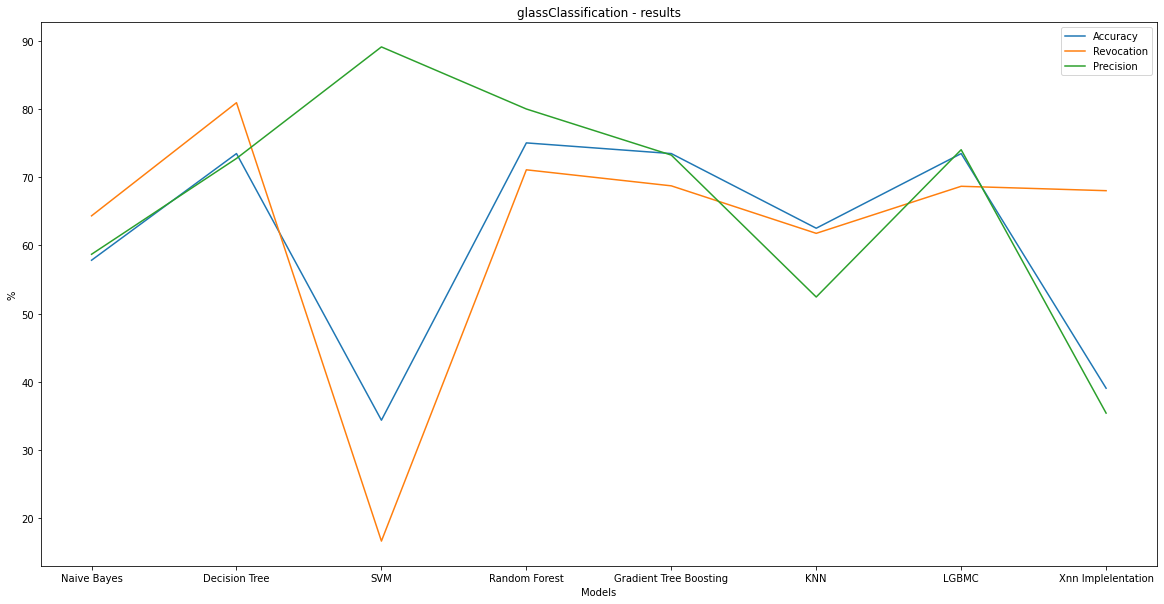

In [408]:
run('glassClassification')

Database: drugClassification
Modelo:  Naive Bayes
Modelo:  Decision Tree
Modelo:  SVM
Modelo:  Random Forest
Modelo:  Gradient Tree Boosting
Modelo:  KNN
Modelo:  LGBMC


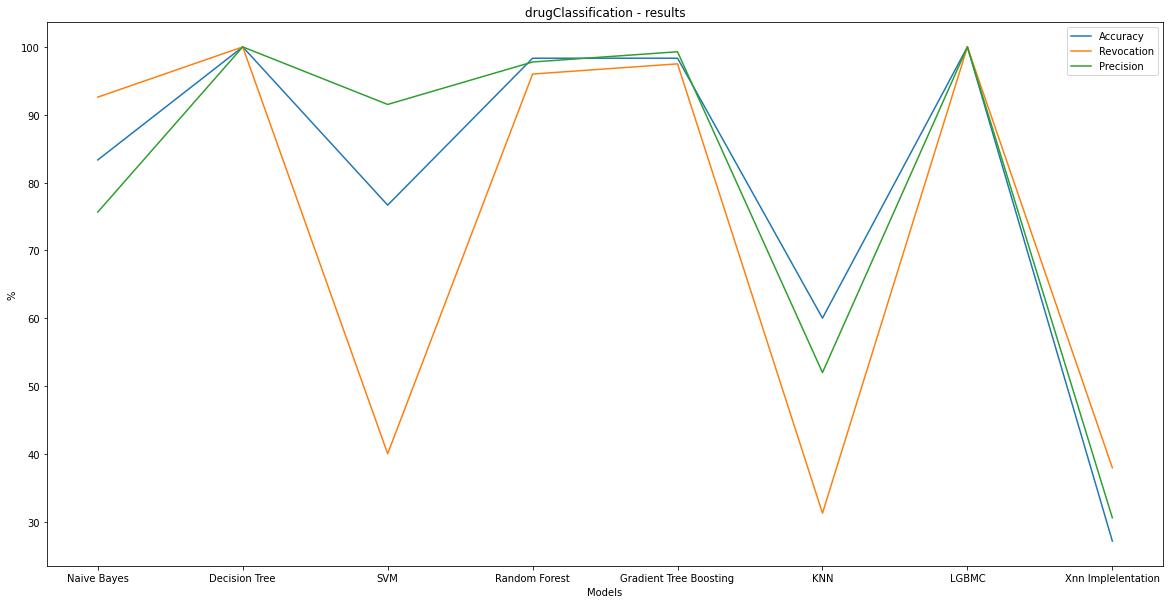

In [407]:
run('drugClassification')
